In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import traceback
import re
import nltk
import re, string
from tqdm import tqdm
import sklearn
import sklearn_json as skljson

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to C:\Users\SUBRAMANIAN
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from tqdm.notebook import tqdm

In [12]:
ps = PorterStemmer()
corpus = []
for i in tqdm(range(0, len(dataset))):
    review1 = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review1 = review1.lower()
    review1 = review1.split()
    
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    corpus.append(review1)

In [13]:
corpus[0]

'wow love place'

In [15]:
type(corpus)

list

In [16]:
dataset_corpus =  pd.DataFrame(corpus,columns=['review_new'])

In [17]:
new_dataset = dataset_corpus.join(dataset)

In [18]:
new_dataset

,review_new,Review,Liked
0,wow love place,Wow... Loved this place.,1
1,crust good,Crust is not good.,0
2,tasti textur nasti,Not tasty and the texture was just nasty.,0
3,stop late may bank holiday rick steve recommen...,Stopped by during the late May bank holiday of...,1
4,select menu great price,The selection on the menu was great and so wer...,1
...,...,...,...
995,think food flavor textur lack,I think food should have flavor and texture an...,0
996,appetit instantli gone,Appetite instantly gone.,0
997,overal impress would go back,Overall I was not impressed and would not go b...,0
998,whole experi underwhelm think go ninja sushi n...,"The whole experience was underwhelming, and I ...",0


In [19]:
new_dataset = new_dataset.drop('Review',axis=1)

In [20]:
new_dataset.to_csv('new_dataset.csv')

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [24]:
import pickle

In [25]:
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [26]:
y = dataset['Liked']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [28]:
cv.get_feature_names()[:30]

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc']

In [29]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [30]:
count_df.head()

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [33]:
from sklearn import metrics
import itertools

accuracy:   0.748
Confusion matrix, without normalization


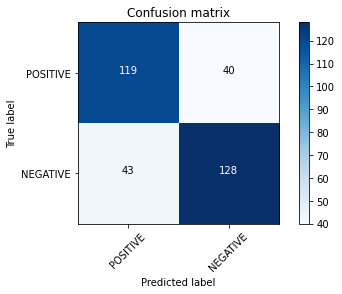

In [34]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE'])

In [35]:
pickle.dump(classifier, open('model_restaurantreview.pkl', 'wb'))